In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
import numpy as np
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [39]:
train_apple = pd.read_csv('../../data_preprocess_v3/train_apple.csv')
train_google = pd.read_csv('../../data_preprocess_v3/train_google.csv')
train_microsoft = pd.read_csv('../../data_preprocess_v3/train_microsoft.csv')
df_train = pd.DataFrame()
df_train= pd.concat([train_apple, train_google, train_microsoft])
test_apple = pd.read_csv('../../data_preprocess_v3/test_apple.csv')
test_google = pd.read_csv('../../data_preprocess_v3/test_google.csv')
test_microsoft = pd.read_csv('../../data_preprocess_v3/test_microsoft.csv')

In [40]:
scaler = MinMaxScaler(feature_range=(0, 1))
var = ['Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)',\
                     'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)', 'Close (t)']
df_train[var] = scaler.fit_transform(df_train[var])
test_apple[var] = scaler.fit_transform(test_apple[var])
test_google[var] = scaler.fit_transform(test_google[var])
test_microsoft[var] = scaler.fit_transform(test_microsoft[var])

In [55]:
# split X and y

independe_var = ['Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)',\
                     'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']

train_X = df_train[independe_var]
train_y_close = df_train['Close (t)']
train_y_movement = df_train['movement']

test_apple_X = test_apple[independe_var]
test_apple_y_close = test_apple['Close (t)']
test_apple_y_movement = test_apple['movement']

test_google_X = test_google[independe_var]
test_google_y_close = test_google['Close (t)']
test_google_y_movement = test_google['movement']

test_microsoft_X = test_microsoft[independe_var]
test_microsoft_y_close = test_microsoft['Close (t)']
test_microsoft_y_movement = test_microsoft['movement']

In [62]:
# design network
inputs = keras.Input(shape=(10, 1))
hidden1 = layers.LSTM(50)(inputs)
hidden2 = layers.Dense(50, activation='relu')(hidden1)
hidden3 = layers.Dense(50, activation='relu')(hidden2)
hidden4 = layers.Dense(50, activation='relu')(hidden3)
outputs = layers.Dense(1)(hidden4)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

model.fit(train_X, train_y_close, epochs = 10, shuffle=True)

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10, 1)]           0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_19 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 51        
Total params: 18,101
Trainable params: 18,101
Non-trainable params: 0
___________________________________________________

Test Apple RMSE: 0.049
Test Google RMSE: 0.047
Test Microsoft RMSE: 0.026


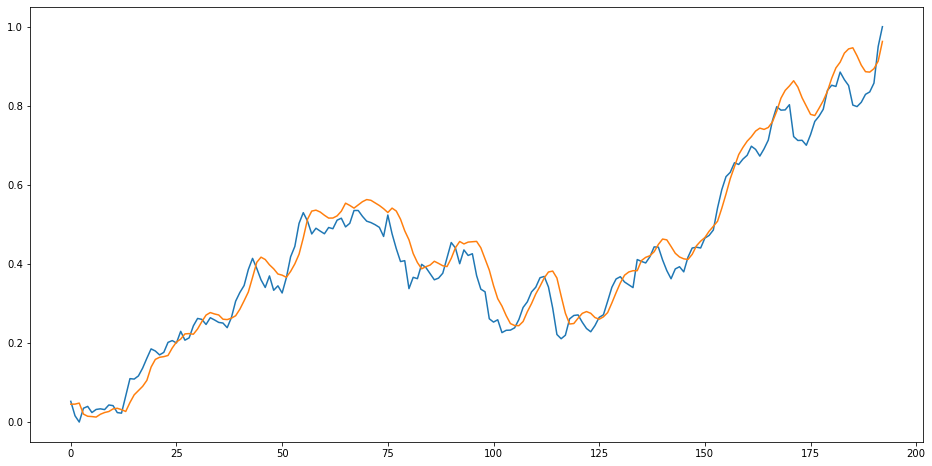

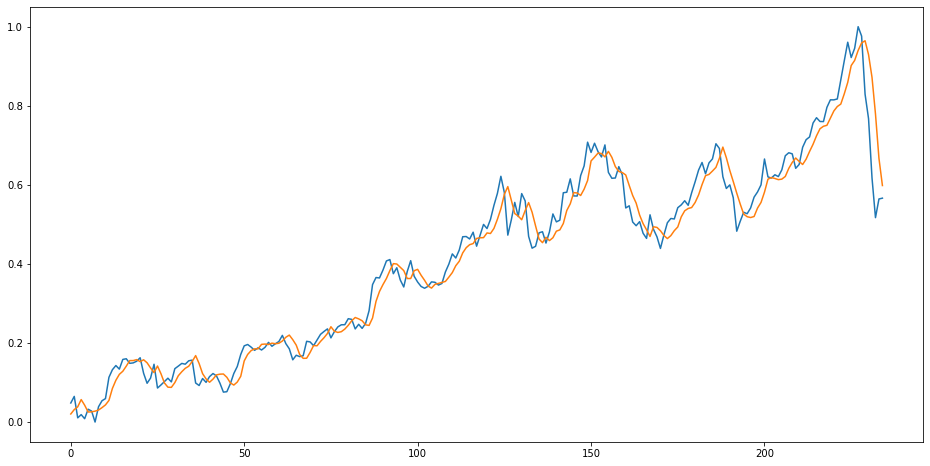

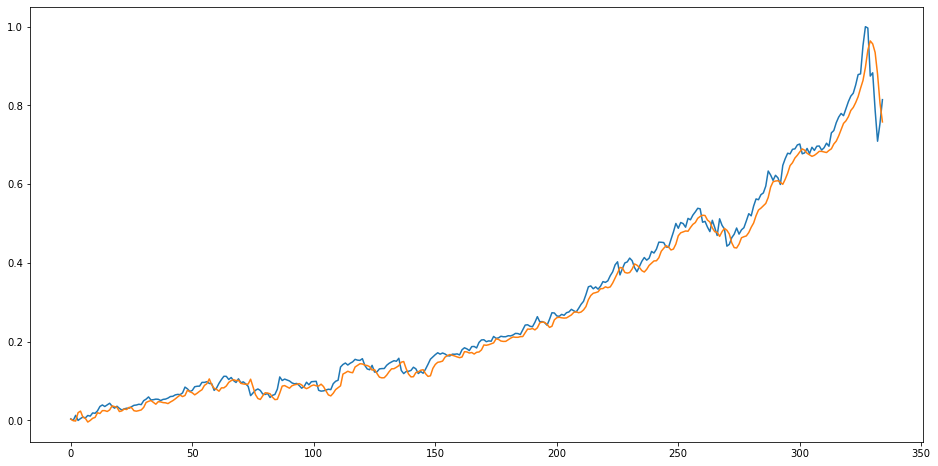

In [63]:
# apple
predict_apple_y_close = model.predict(test_apple_X)
rmse = sqrt(mean_squared_error(test_apple_y_close, predict_apple_y_close))
print('Test Apple RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test_apple_y_close)
plt.plot(predict_apple_y_close)

# google
predict_google_y_close = model.predict(test_google_X)
rmse = sqrt(mean_squared_error(test_google_y_close, predict_google_y_close))
print('Test Google RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test_google_y_close)
plt.plot(predict_google_y_close)

# microsoft
predict_microsoft_y_close = model.predict(test_microsoft_X)
rmse = sqrt(mean_squared_error(test_microsoft_y_close, predict_microsoft_y_close))
print('Test Microsoft RMSE: %.3f' % rmse)

plt.figure(figsize=(16,8))
plt.plot(test_microsoft_y_close)
plt.plot(predict_microsoft_y_close)

In [64]:
# compute binary result

# apple
predict_apple_y_movement = [0]

for i in range(0, len(predict_apple_y_close) - 1):
    if predict_apple_y_close[i] < predict_apple_y_close[i + 1]:
        predict_apple_y_movement.append(1)
    else:
        predict_apple_y_movement.append(0)
        
# google
predict_google_y_movement = [0]

for i in range(0, len(predict_google_y_close) - 1):
    if predict_google_y_close[i] < predict_google_y_close[i + 1]:
        predict_google_y_movement.append(1)
    else:
        predict_google_y_movement.append(0)
        
# microsoft
predict_microsoft_y_movement = [0]

for i in range(0, len(predict_microsoft_y_close) - 1):
    if predict_microsoft_y_close[i] < predict_microsoft_y_close[i + 1]:
        predict_microsoft_y_movement.append(1)
    else:
        predict_microsoft_y_movement.append(0)

print("Apple")
print(confusion_matrix(test_apple_y_movement, predict_apple_y_movement))
print('Precision: %.3f' % precision_score(test_apple_y_movement, predict_apple_y_movement))
print('Recall: %.3f' % recall_score(test_apple_y_movement, predict_apple_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_apple_y_movement, predict_apple_y_movement))
print('F1-score: %.3f\n' % f1_score(test_apple_y_movement, predict_apple_y_movement))

print("Google")
print(confusion_matrix(test_google_y_movement, predict_google_y_movement))
print('Precision: %.3f' % precision_score(test_google_y_movement, predict_google_y_movement))
print('Recall: %.3f' % recall_score(test_google_y_movement, predict_google_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_google_y_movement, predict_google_y_movement))
print('F1-score: %.3f\n' % f1_score(test_google_y_movement, predict_google_y_movement))

print("Microsoft")
print(confusion_matrix(test_microsoft_y_movement, predict_microsoft_y_movement))
print('Precision: %.3f' % precision_score(test_microsoft_y_movement, predict_microsoft_y_movement))
print('Recall: %.3f' % recall_score(test_microsoft_y_movement, predict_microsoft_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_microsoft_y_movement, predict_microsoft_y_movement))
print('F1-score: %.3f\n' % f1_score(test_microsoft_y_movement, predict_microsoft_y_movement))

Apple
[[33 49]
 [39 72]]
Precision: 0.595
Recall: 0.649
Accuracy: 0.544
F1-score: 0.621

Google
[[33 59]
 [55 88]]
Precision: 0.599
Recall: 0.615
Accuracy: 0.515
F1-score: 0.607

Microsoft
[[ 45  83]
 [ 82 125]]
Precision: 0.601
Recall: 0.604
Accuracy: 0.507
F1-score: 0.602



# Use 10 to predict 1

In [118]:
df_train = pd.read_csv('../../Shu Rui/train.csv')
df_test = pd.read_csv('../../Shu Rui/test.csv')

# normalise
scaler_volumeind = MinMaxScaler(feature_range=(0, 1))
scaler_closeind = MinMaxScaler(feature_range=(0, 1))
scaler_closedep = MinMaxScaler(feature_range=(0, 1))
vol_var = ['Volume (t-10)', 'Volume (t-9)', 'Volume (t-8)', 'Volume (t-7)', 'Volume (t-6)', 
       'Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)']
close_var = ['Close (t-10)', 'Close (t-9)', 'Close (t-8)', 'Close (t-7)', 'Close (t-6)',
       'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
train_data[vol_var] = scaler_volumeind.fit_transform(df_train[vol_var])
train_data[close_var] = scaler_closeind.fit_transform(df_train[close_var])
train_data[['Close (t)']] = scaler_closedep.fit_transform(df_train[['Close (t)']])
test_data[vol_var] = scaler_volumeind.fit_transform(df_test[vol_var])
test_data[close_var] = scaler_closeind.fit_transform(df_test[close_var])
test_data[['Close (t)']] = scaler_closedep.fit_transform(df_test[['Close (t)']])

# split X and y
ind_var = ['Volume (t-10)', 'Volume (t-9)', 'Volume (t-8)', 'Volume (t-7)', 'Volume (t-6)', 
           'Volume (t-5)', 'Volume (t-4)', 'Volume (t-3)', 'Volume (t-2)', 'Volume (t-1)', 
           'Close (t-10)', 'Close (t-9)', 'Close (t-8)', 'Close (t-7)', 'Close (t-6)',
           'Close (t-5)', 'Close (t-4)', 'Close (t-3)', 'Close (t-2)', 'Close (t-1)']
train_X = train_data[ind_var]
train_y_close = train_data['Close (t)']
train_y_movement = train_data['movement']
test_X = test_data[ind_var]
test_y_close = test_data['Close (t)']
test_y_movement = test_data['movement']

# design network
inputs = keras.Input(shape=(20, 1))
hidden1 = layers.LSTM(50)(inputs)
hidden2 = layers.Dense(50, activation='relu')(hidden1)
hidden3 = layers.Dense(50, activation='relu')(hidden2)
hidden4 = layers.Dense(50, activation='relu')(hidden3)
outputs = layers.Dense(1)(hidden4)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

# fit model
model.fit(train_X, train_y_close, epochs = 10, shuffle=True)

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_53 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_54 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_55 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_56 (Dense)             (None, 1)                 51        
Total params: 18,101
Trainable params: 18,101
Non-trainable params: 0
___________________________________________________

Test RMSE: 71.579


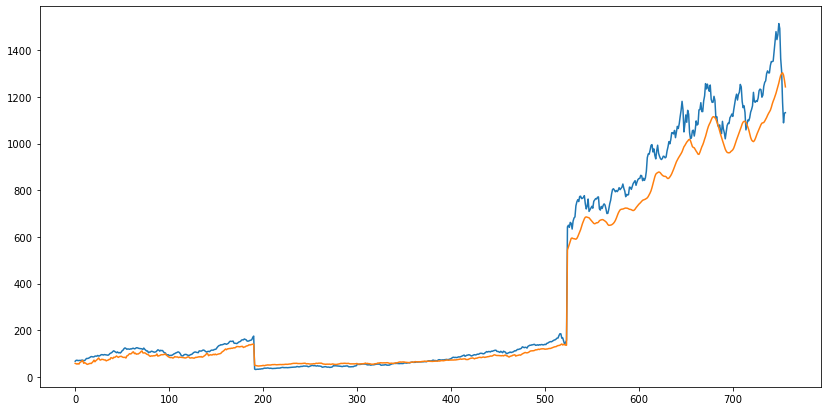

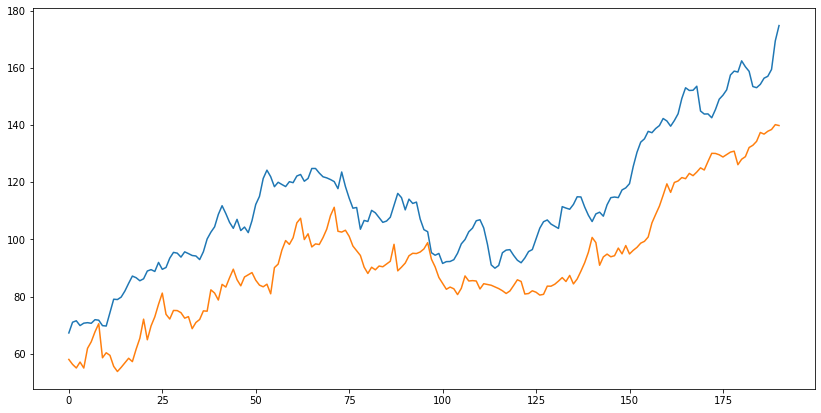

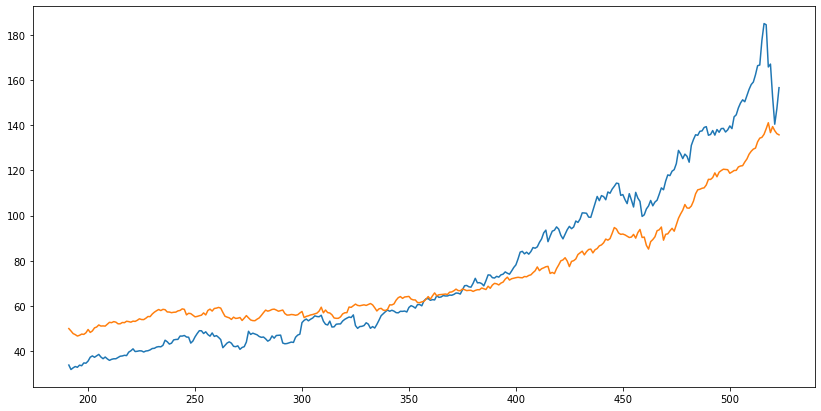

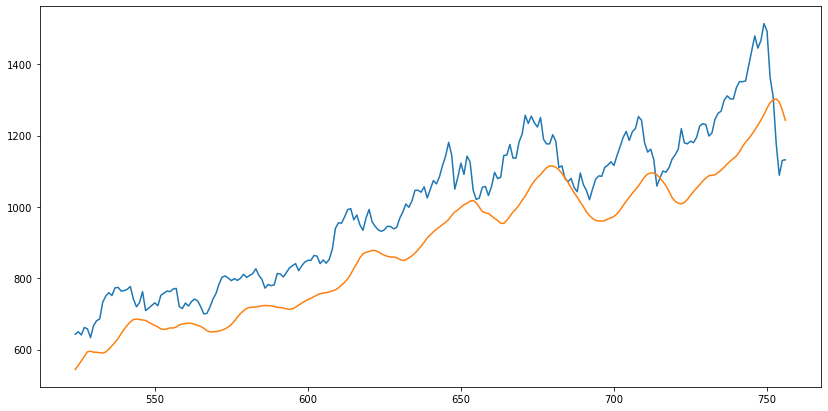

In [120]:
# predict
predict_y_close = model.predict(test_X)
predict_y_close = scaler_closedep.inverse_transform(predict_y_close)
predict_y_close = pd.DataFrame(predict_y_close)
test_y_close = df_test['Close (t)']
rmse = sqrt(mean_squared_error(test_y_close, predict_y_close))
print('Test RMSE: %.3f' % rmse)


test_apple = test_y_close[:191]
test_microsoft = test_y_close[191:524]
test_google = test_y_close[524:757]

predict_apple = predict_y_close[:191]
predict_microsoft = predict_y_close[191:524]
predict_google = predict_y_close[524:757]

plt.figure(figsize=(14,7))
plt.plot(test_y_close)
plt.plot(predict_y_close)

plt.figure(figsize=(14,7))
plt.plot(test_apple)
plt.plot(predict_apple)

plt.figure(figsize=(14,7))
plt.plot(test_microsoft)
plt.plot(predict_microsoft)

plt.figure(figsize=(14,7))
plt.plot(test_google)
plt.plot(predict_google)

In [121]:
# binary
predict_y_movement = [0]

arr = np.array(predict_y_close)
for i in range(0, len(arr) - 1):
    if arr[i] < arr[i + 1]:
        predict_y_movement.append(1)
    else:
        predict_y_movement.append(0)
        
bin_test_apple = test_y_movement[:191]
bin_test_microsoft = test_y_movement[191:524]
bin_test_google = test_y_movement[524:757]
bin_pred_apple = predict_y_movement[:191]
bin_pred_microsoft = predict_y_movement[191:524]
bin_pred_google = predict_y_movement[524:757]

print('Overall:')
print(confusion_matrix(test_y_movement, predict_y_movement))
print('Precision: %.3f' % precision_score(test_y_movement, predict_y_movement))
print('Recall: %.3f' % recall_score(test_y_movement, predict_y_movement))
print('Accuracy: %.3f' % accuracy_score(test_y_movement, predict_y_movement))
print('F1-score: %.3f\n' % f1_score(test_y_movement, predict_y_movement))

print('Apple:')
print(confusion_matrix(bin_test_apple, bin_pred_apple))
print('Precision: %.3f' % precision_score(bin_test_apple, bin_pred_apple))
print('Recall: %.3f' % recall_score(bin_test_apple, bin_pred_apple))
print('Accuracy: %.3f' % accuracy_score(bin_test_apple, bin_pred_apple))
print('F1-score: %.3f\n' % f1_score(bin_test_apple, bin_pred_apple))

print('Microsoft:')
print(confusion_matrix(bin_test_microsoft, bin_pred_microsoft))
print('Precision: %.3f' % precision_score(bin_test_microsoft, bin_pred_microsoft))
print('Recall: %.3f' % recall_score(bin_test_microsoft, bin_pred_microsoft))
print('Accuracy: %.3f' % accuracy_score(bin_test_microsoft, bin_pred_microsoft))
print('F1-score: %.3f\n' % f1_score(bin_test_microsoft, bin_pred_microsoft))

print('Google:')
print(confusion_matrix(bin_test_google, bin_pred_google))
print('Precision: %.3f' % precision_score(bin_test_google, bin_pred_google))
print('Recall: %.3f' % recall_score(bin_test_google, bin_pred_google))
print('Accuracy: %.3f' % accuracy_score(bin_test_google, bin_pred_google))
print('F1-score: %.3f\n' % f1_score(bin_test_google, bin_pred_google))

Overall:
[[134  84]
 [145 394]]
Precision: 0.824
Recall: 0.731
Accuracy: 0.697
F1-score: 0.775

Apple:
[[34 27]
 [46 84]]
Precision: 0.757
Recall: 0.646
Accuracy: 0.618
F1-score: 0.697

Microsoft:
[[ 42  37]
 [ 79 175]]
Precision: 0.825
Recall: 0.689
Accuracy: 0.652
F1-score: 0.751

Google:
[[ 58  20]
 [ 20 135]]
Precision: 0.871
Recall: 0.871
Accuracy: 0.828
F1-score: 0.871

